# Assignment 7

In [138]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

import tensorflow as tf
from tensorflow import keras

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "report"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [139]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [140]:
X_train_full.shape

(60000, 28, 28)

In [141]:
X_train_full.dtype

dtype('uint8')

In [142]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

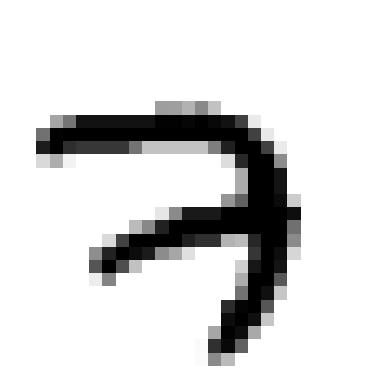

In [143]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [144]:
y_train

array([7, 3, 4, ..., 5, 6, 8], shape=(55000,), dtype=uint8)

In [145]:
X_valid.shape

(5000, 28, 28)

In [146]:
X_test.shape

(10000, 28, 28)

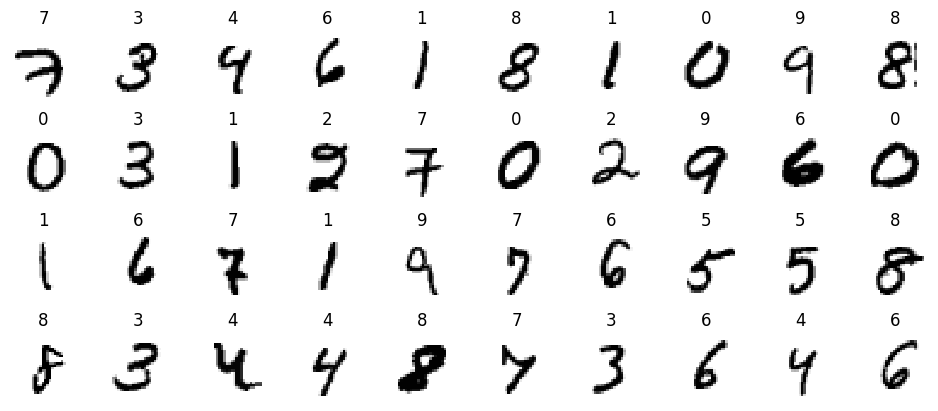

In [147]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

[0 1 2 3 4 5 6 7 8 9]
[5444 6179 5470 5638 5307 4987 5417 5715 5389 5454]


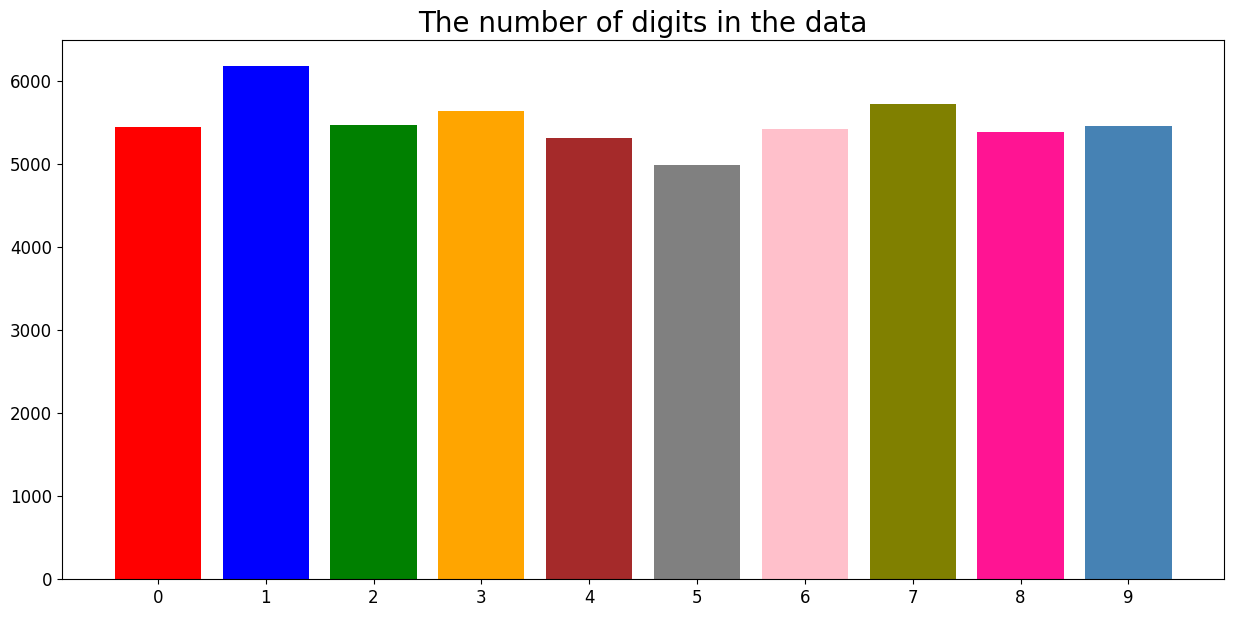

In [148]:
un = np.unique_counts(y_train)
print(un.values)
print(un.counts)

mycolors = ['red', 'blue', 'green', 'orange', 'brown', 'grey', 'pink', 'olive', 'deeppink', 'steelblue']

plt.figure(figsize = (15, 7))
plt.title("The number of digits in the data", fontsize = 20)
plt.xticks(range(10))
plt.bar(un.values, un.counts, color = mycolors);

In [149]:
y_train.shape

(55000,)

In [150]:
# from keras.utils import to_categorical

# y_train = to_categorical(y_train)

# y_valid = to_categorical(y_valid)

In [151]:
y_train.shape

(55000,)

In [152]:
# print(type(model.optimizer.learning_rate.dtype))

# print(model.optimizer.learning_rate.dtype)

set_value is deprecated, use assign() instead

In [153]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        # K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)
        self.model.optimizer.learning_rate.assign(
            self.model.optimizer.learning_rate * self.factor
        )

In [154]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [155]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

/home/vinh/hv/iai600/assignments/7/repo/dev/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [156]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [157]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [158]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr]
                    )

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.5748 - loss: nan - val_accuracy: 0.0958 - val_loss: nan


Text(0, 0.5, 'Loss')

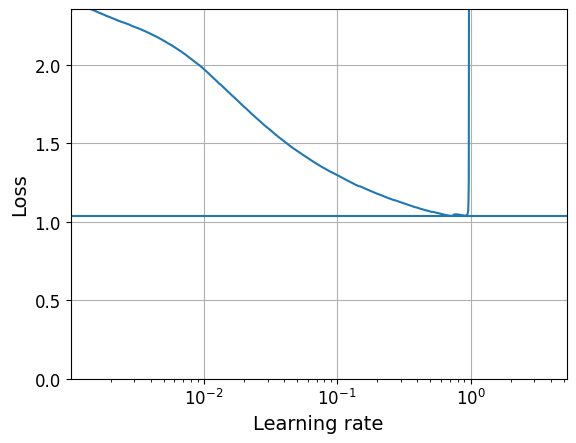

In [159]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

# Check point

In [160]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

run_index = 1 # increment this at every run

Note: best hyperparameters currently is:
- 1 layer Dense 500 neurons relu: 0.981 accu on test set

In [161]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [162]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [163]:
lr = model.layers[2]

w, b = lr.get_weights()

print(w)
print(b)

[[ 0.00992966  0.04092679  0.07738223 ... -0.00040986 -0.06576365
   0.02958871]
 [-0.03721229  0.09101572 -0.05323814 ... -0.01863977  0.00767302
   0.11962899]
 [-0.01384506 -0.06900145  0.12116013 ...  0.12001953  0.1104669
   0.00113472]
 ...
 [-0.01853827 -0.10047938 -0.10973873 ... -0.03460892 -0.10430855
  -0.1019076 ]
 [ 0.10407042  0.03959564  0.04645359 ...  0.06090032 -0.12167796
   0.00405856]
 [-0.07834902 -0.03439312 -0.02964801 ... -0.03535428 -0.09333427
  -0.08135436]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [164]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [165]:

run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [166]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.keras", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8447 - loss: 0.5974 - val_accuracy: 0.9182 - val_loss: 0.3037
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9175 - loss: 0.2868 - val_accuracy: 0.9330 - val_loss: 0.2367
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9324 - loss: 0.2349 - val_accuracy: 0.9434 - val_loss: 0.2010
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9417 - loss: 0.2011 - val_accuracy: 0.9508 - val_loss: 0.1763
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9498 - loss: 0.1759 - val_accuracy: 0.9570 - val_loss: 0.1580
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9560 - loss: 0.1561 - val_accuracy: 0.9614 - val_loss: 0.1439
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9607 - loss: 0.1401 - val_accuracy: 0.9638 - val_loss: 0.1324
Epoch 8/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9641 -

Saving figure mlp_learning_curve


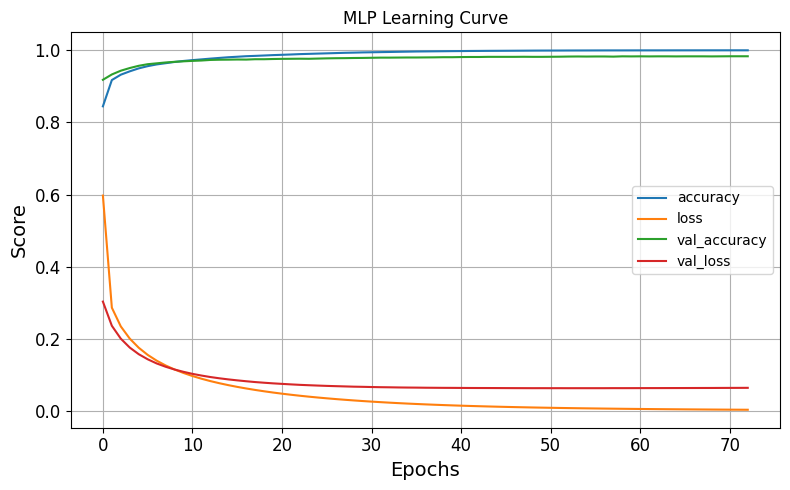

In [175]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.title("MLP Learning Curve")
plt.xlabel("Epochs")
plt.ylabel("Score")

save_fig("mlp_learning_curve")

plt.show()


In [168]:
model = keras.models.load_model("my_mnist_model.keras") # rollback to best model
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9788 - loss: 0.0708


[0.07079637795686722, 0.9787999987602234]

In [169]:
# %load_ext tensorboard

# %tensorboard --logdir=./my_mnist_logs --port=6006